# Team DatenWelle

## Exploratory data analysis

This notebook loads the data from JSON format and performs some initial clean-up and visualisation tasks

In [152]:
#!git pull
#!git status
#!git add 1-anya_exploratory_analysis.ipynb
#!git commit -m 'made a set of keywords 2019-2022'
#!git push
#!pip install -r ../requirements.txt

#after installed new libraries
#!pip freeze > requirements.txt
#!git add requirements.txt
#!git commit -m 'added library fuzzywuzzy'
#!git push 

In [153]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import functools
import operator
import os
import os.path as op
import numpy as np
import pytrends
from pytrends.request import TrendReq as UTrendReq
from datetime import date
import datetime as d
from collections import Counter


In [154]:
GET_METHOD='get'


headers = {
    'authority': 'trends.google.com',
    'accept': 'application/json, text/plain, */*',
    'accept-language': 'el-GR,el;q=0.9,en;q=0.8,es;q=0.7',
    'content-type': 'application/json;charset=UTF-8',
    'cookie': '__utma=10102256.1937595387.1677588086.1677588086.1678441622.2; __utmc=10102256; __utmz=10102256.1678441622.2.2.utmcsr=trends.google.com|utmccn=(referral)|utmcmd=referral|utmcct=/; __utmt=1; __utmb=10102256.13.9.1678442016068; CONSENT=YES+GB.en-GB+; HSID=AwrWd8APwv-yBWgzh; SSID=AeXCoum7ArBP5_-aa; APISID=CH4IjtEJhVzXdXGB/AFPE6uuFtOUDiSjnb; SAPISID=FcPgZF83fs0zxFml/Ad59_bwdrgg_kZ4q4; __Secure-1PAPISID=FcPgZF83fs0zxFml/Ad59_bwdrgg_kZ4q4; __Secure-3PAPISID=FcPgZF83fs0zxFml/Ad59_bwdrgg_kZ4q4; SID=TwhPHvTugfJu62Xh-HCJkOIPdoEDrL6q-6Eu9itbEI8mmKw9wzJdgT6c48lYdsNyN4E5xA.; __Secure-1PSID=TwhPHvTugfJu62Xh-HCJkOIPdoEDrL6q-6Eu9itbEI8mmKw9mFTrJ0j2r8zMRcq3v-A7Dg.; __Secure-3PSID=TwhPHvTugfJu62Xh-HCJkOIPdoEDrL6q-6Eu9itbEI8mmKw9xQIlYIR6TyZD2qXkeuopSA.; OGPC=19031986-1:; AEC=ARSKqsLpZW_sbZN2NdijlA8HPzuRHa1TPtYLHLGgaOIZpt8oJZL9PYZZYQ; SEARCH_SAMESITE=CgQI4ZcB; 1P_JAR=2023-03-10-09; NID=511=bYRTpZST7bJyL0z371h4Y79EMA1j9QqQFUpi8vJsSmiWdINx5gKruSDljEBAFfs9FYsxRrmP7vulT_MdtU2xEXQSW837vsgNY9s0i2WZAeFETmMEDrju3d_HgA2Wxy5DrFrIOaOiFu6LkpD7pY4wF4qrMZ38BzvW4NkYX_fUI7bFzHXsg24iHara1hPmPIXOSl6wQgsssfGHUntOI9PgY_eXaAEJbY7VgTr1hjNvEDlFSYOuzLvHSzo9kX9ALXA5-WOICbuLdAucZc3hJKo1dUKM51JCkzLsUHm99MWA86Icz-dmMW8ybQZhEUd2YgsBHHn5MV8uSVpcZ53n4_KL7r6sOpfWZ0ZXairmL3NH-hHz4Vyq; _gid=GA1.3.1682047475.1678441583; OTZ=6935626_48_48_123900_44_436380; _gat_gtag_UA_4401283=1; _ga=GA1.3.1937595387.1677588086; SIDCC=AFvIBn_I_znBUYDEoxfE1jUbrp_F8T607DZhlzI9o_gQoZmA4OxNjglOrH8Q8er3Cv4uzoWYkX9Z; __Secure-1PSIDCC=AFvIBn_Nhc9nywxJ_UrRYogvErcX48ygHEiBzjRRZtPe-mIwBTe_M7UbvKR4d-rAuhYyGJi-Dm0; __Secure-3PSIDCC=AFvIBn8vpeAOp5e0oAWBAETEzSClsyQlm3vQJhAQP7T7Z51q1K7zHDm_-CSGFEPasFw0sRHoJDU; _ga_VWZPXDNJJB=GS1.1.1678441583.2.1.1678442016.0.0.0',
    'origin': 'https://trends.google.com',
    'referer': 'https://trends.google.com/trends/explore?date=now%201-d&q=Adele&hl=en-GB',
    'sec-ch-ua': '"Chromium";v="110", "Not A(Brand";v="24", "Google Chrome";v="110"',
    'sec-ch-ua-arch': '"x86"',
    'sec-ch-ua-bitness': '"64"',
    'sec-ch-ua-full-version': '"110.0.5481.177"',
    'sec-ch-ua-full-version-list': '"Chromium";v="110.0.5481.177", "Not A(Brand";v="24.0.0.0", "Google Chrome";v="110.0.5481.177"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-model': '',
    'sec-ch-ua-platform': '"macOS"',
    'sec-ch-ua-platform-version': '"13.2.1"',
    'sec-ch-ua-wow64': '?0',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-origin',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36',
    'x-client-data': 'CIq2yQEIprbJAQjEtskBCKmdygEIkufKAQiVocsBCPyqzAEI9/XMAQib/swBCI6MzQEIlZbNAQiols0BCOGXzQEI5JfNAQjzl80BCMyYzQEI2JjNAQjzmc0BCLSazQEI0uGsAg==',
}


class TrendReq(UTrendReq):
    def _get_data(self, url, method=GET_METHOD, trim_chars=0, **kwargs):
        return super()._get_data(url, method=GET_METHOD, trim_chars=trim_chars, headers=headers, **kwargs)




In [155]:
# Opening JSON file
f = open('/home/marios/data/dw-project-data/CMS_2010_to_June_2022_ENGLISH.json')
# returns JSON object as a dictionary
data = json.load(f)
df = pd.DataFrame.from_dict(data)
df = df.sort_values(by= 'lastModifiedDate')
df = df.reset_index()

### Keywords exploration

In [9]:
df_subset.keywordStrings

60278                  [NASA, OSIRIS-REx, Bennu, asteroid]
60279    [English Channel, migration, boats, illegal im...
60280    [Brazil, Jair Bolsonaro, Chicago economics, Ha...
60281                     [Japan, Tokyo, Harajuku, attack]
60282    [Asia, Bangladesh, elections, Kamal Hossain, S...
60283    [Iran, sanctions, civil society, nuclear deal,...
60284    [Liviu Dragnea, Viorica Dancila, Klaus Iohanni...
60285    [counterfeit alcohol, adulterated alcohol, fak...
60286    [Edgar Hilsenrath, Schriftsteller, Jude, Der N...
60287      [Indonesia, Java, landslide, natural disasters]
Name: keywordStrings, dtype: object

In [12]:
df_subset.keywordStrings
kw_flat = functools.reduce(operator.add, df_subset.keywordStrings)

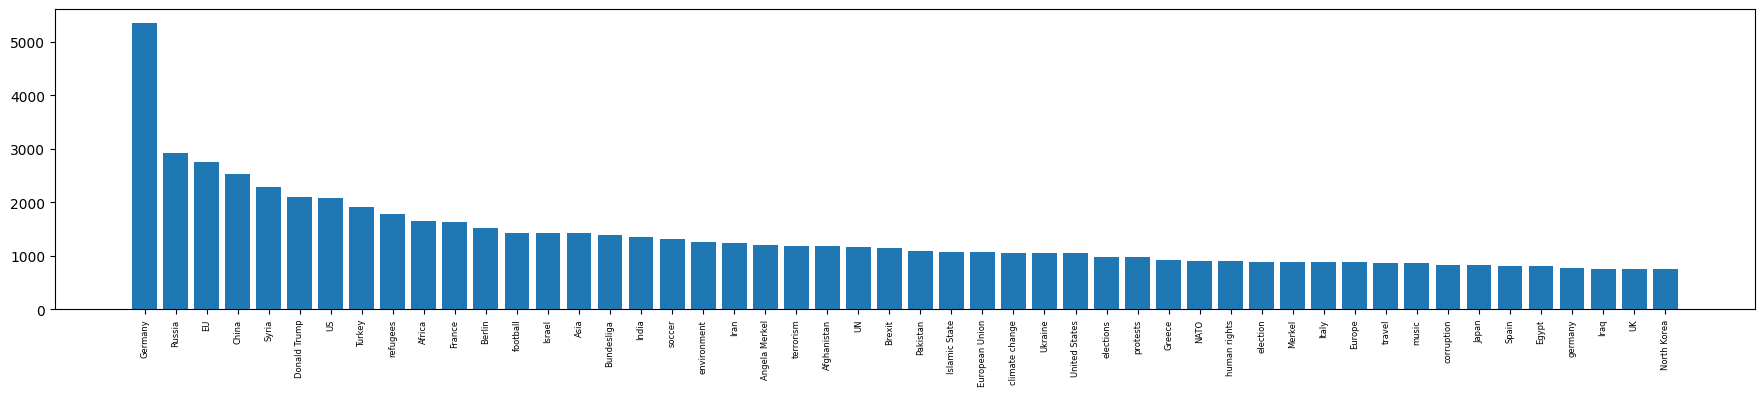

In [15]:
from collections import Counter

freq_kwords = Counter(kw_flat).most_common(50)
x, y = zip(*freq_kwords)

fig = plt.figure(figsize=(17,3))
ax = fig.add_axes([0,0,1,1])
ax.bar(x, y)
plt.xticks(fontsize=6, rotation=90)
plt.show()

In [22]:
output_dir = '/home/marios/S2DS/Spring23_DW/data/processed'
file_name = 'flat_keywords_2019.npy'

np.save(op.join(output_dir, file_name), kw_flat)

In [24]:
kw_flat.count('Angela Merkel')

1206

## Angela Analysis

In [161]:
pytrend = TrendReq()
angie_does_google =pytrend.build_payload(kw_list= ['Angela Merkel'], timeframe='2010-01-01 2023-03-15')
angie_does_google = pytrend.interest_over_time()
angie_does_google = angie_does_google.drop('isPartial', axis = 'columns')


In [162]:
#let's get timeseries from all Angela Merkel mentions 
not_angela_indices = []
for i, row in enumerate(df['keywordStrings']):
    if 'Angela Merkel' not in row:
        not_angela_indices.append(i)

df_angela = df.drop(not_angela_indices)

df_angela['date_month'] = df_angela.lastModifiedDate.apply(lambda x: x[:7] if x is not None else x)
df_angela['date_month'] = df_angela['date_month'].apply(lambda x: int(x.replace('-','')))
all_year_months = [year*100+month for month in range(1, 13) for year in range(2010, 2023)]

In [163]:
not_in_df = list(set(all_year_months) - set(df_angela['date_month'].tolist()))
yearmonth_counts = dict(Counter(df_angela['date_month'].tolist()))
for key_ in not_in_df:
    yearmonth_counts[key_] = 0 

In [164]:
yearmonth_counts.keys()
df_yearmonth_counts = pd.DataFrame.from_dict(yearmonth_counts, orient='index', columns=['val'])
df_yearmonth_counts['month_str'] = [str(i) for i in df_yearmonth_counts.index]
df_yearmonth_counts = df_yearmonth_counts.sort_values(by='month_str')


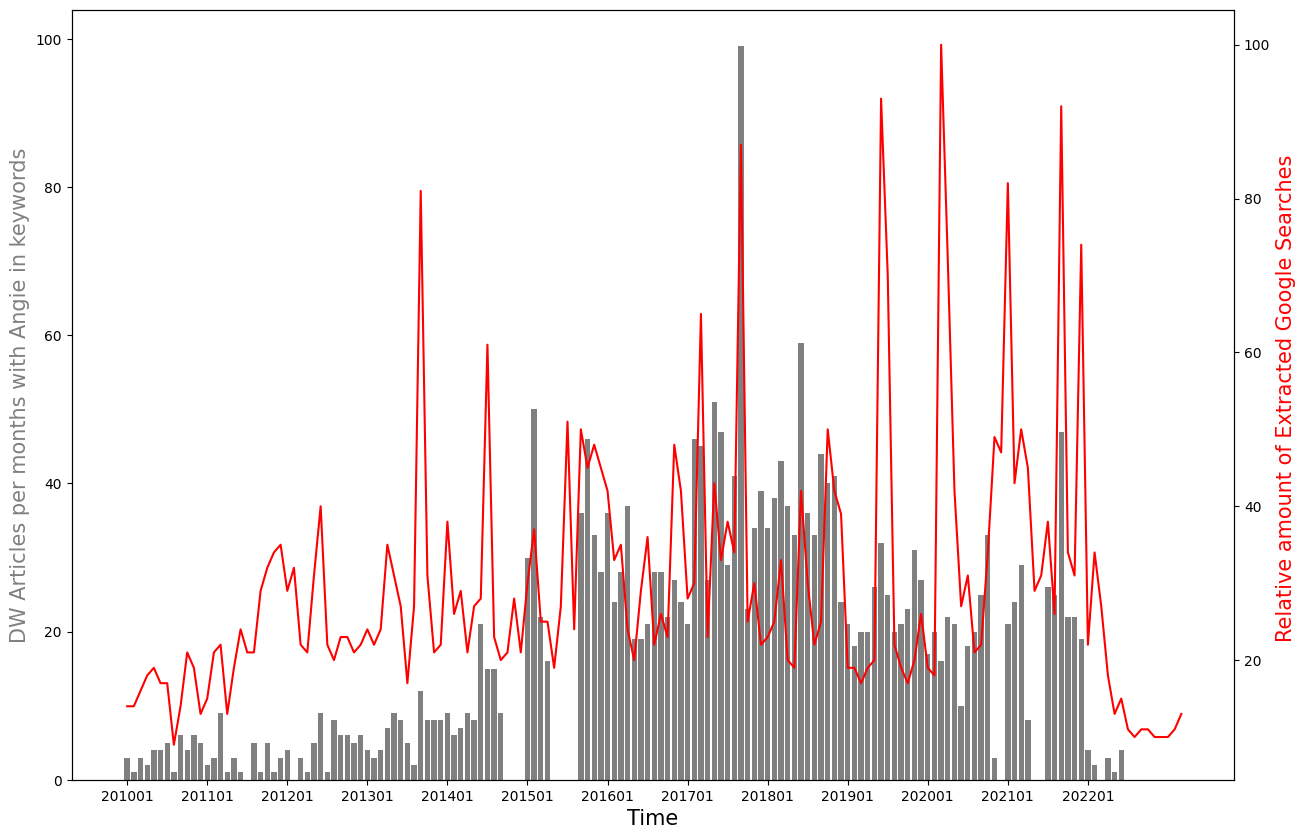

In [165]:
fig,ax = plt.subplots(figsize = (15,10))
ax.bar(df_yearmonth_counts['month_str'], df_yearmonth_counts.val, color = 'grey')
ax.set_xticks(df_yearmonth_counts['month_str'][::12], rotate = 60)
ax.set_xlabel('Time', fontsize = 15)
ax.set_ylabel('DW Articles per months with Angie in keywords', color = 'grey', fontsize = 15)
ax2 = ax.twinx()
ax2.plot(np.arange(0,len(angie_does_google.values)), angie_does_google.values, color = 'r')
ax2.set_ylabel('Relative amount of Extracted Google Searches ', color = 'r', fontsize = 15)
# save it
output_dir = '/home/marios/S2DS/Spring23_DW/reports/figures'
file_name = 'Angela_Merkel_and_DW_a_love_story.pdf'
fig.savefig(op.join(output_dir,file_name))
plt.show()


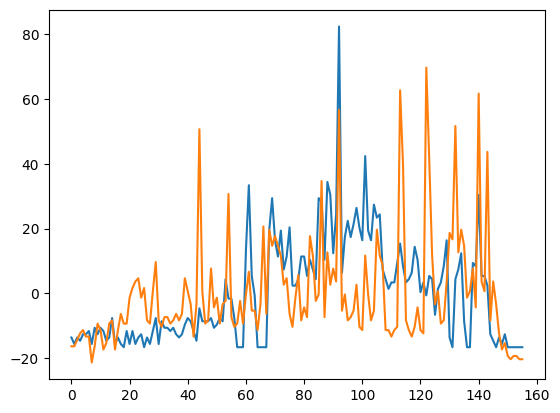

In [166]:
size = df_yearmonth_counts.val.values.shape[0]
dw = df_yearmonth_counts.val.values
google = angie_does_google[:size]['Angela Merkel'].values

#let's subtract the meean from each signal 
dw_submean = dw-np.mean(dw)
google_submean = google-np.mean(google)

plt.plot(dw_submean)
plt.plot(google_submean)

In [167]:
#!pip3 install statsmodels
from statsmodels.tsa.stattools import grangercausalitytests

mix_df = pd.DataFrame({'dw':dw, 'google':google})
gc_res = grangercausalitytests(mix_df, 5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.1545  , p=0.0433  , df_denom=152, df_num=1
ssr based chi2 test:   chi2=4.2365  , p=0.0396  , df=1
likelihood ratio test: chi2=4.1796  , p=0.0409  , df=1
parameter F test:         F=4.1545  , p=0.0433  , df_denom=152, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.6544  , p=0.0737  , df_denom=149, df_num=2
ssr based chi2 test:   chi2=5.4869  , p=0.0643  , df=2
likelihood ratio test: chi2=5.3914  , p=0.0675  , df=2
parameter F test:         F=2.6544  , p=0.0737  , df_denom=149, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.8790  , p=0.1357  , df_denom=146, df_num=3
ssr based chi2 test:   chi2=5.9072  , p=0.1162  , df=3
likelihood ratio test: chi2=5.7960  , p=0.1220  , df=3
parameter F test:         F=1.8790  , p=0.1357  , df_denom=146, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.4052  , p=0.2353  

## TESTING VARIOUS THINGS: PLEASE IGNORE 

In [45]:
df_angela.sort_values(by='id').sort_index()

,index,id,name,shortTitle,text,teaser,shortTeaser,kicker,regions,keywords,...,articles,isOpinion,geographicLocations,contentAssociations,mainContentImageLink,images,externalLinks,topStory,language,date_month
0,55250,5070917,EU presidency power-sharing takes effect,EU shake-up,"<p>The Lisbon Treaty, which came into force at...",Spain takes over the European Union's rotating...,Spain is taking over the EU presidency just as...,None,[],"[{'name': 'Lisbon Treaty'}, {'name': 'European...",...,[{'name': 'Sweden wraps up six months in EU pr...,False,[],"[{'id': 28158946}, {'id': 28158947}, {'id': 28...",{'description': 'Lisbon Treaty: simplifying or...,"[{'name': 'Symbolbild Europa Fragezeichen'}, {...",[],False,None,201001
375,55625,5136869,Germany's Merkel meets coalition partners to e...,Soothing tensions,<p>Merkel met with her foreign minister and le...,German Chancellor Angela Merkel met her coalit...,German Chancellor Merkel met coalition partner...,None,[],"[{'name': 'Angela Merkel'}, {'name': 'Guido We...",...,[{'name': 'CSU rejects Foreign Minister Wester...,False,[],"[{'id': 28181369}, {'id': 28181370}, {'id': 28...",{'description': 'The ruling coalition has suff...,[{'name': 'Deutschland Angela Merkel Bundestag...,[],False,None,201001
518,55768,5161088,Germany fine-tunes its stance on Afghanistan,Afghanistan conference,<p>Angela Merkel will sit down with Foreign Mi...,The German federal government plans a series o...,German ministers are preparing their strategy ...,None,[],"[{'name': 'Afghanistan'}, {'name': 'troop surg...",...,[{'name': 'Germany agrees to accelerate Afghan...,False,[],"[{'id': 28188959}, {'id': 28188960}, {'id': 28...","{'description': 'There are about 4,500 German ...",[{'name': 'Deutsche ISAF Soldaten kehren von e...,[],False,None,201001
734,55984,5199880,Merkel backs push to restart Mid-East peace talks,Merkel for Mid-East peace,"<p>At a press conference with Abbas, the chanc...",Chancellor Angela Merkel said on Monday that G...,Chancellor Merkel and Palestinian leader Abbas...,None,[],"[{'name': 'Mid-East'}, {'name': 'Middle East'}...",...,[{'name': 'Israeli president touches down in G...,False,[],"[{'id': 28200790}, {'id': 28200791}, {'id': 28...",{'description': 'Merkel called on Israel and t...,[{'name': 'Deutschland Palästinenser Mahmud Ab...,[],False,None,201002
1474,56724,5299788,Angela Merkel rules out German bailout for Greece,More measures needed,<p>The EU's top finance chief said Monday that...,Chancellor Merkel has taken a tough line on th...,The EU says Greece needs to do still more to b...,None,[],"[{'name': 'Angela Merkel'}, {'name': 'Greece'}...",...,[{'name': 'Plan for Germany to buy Greek bonds...,False,[],"[{'id': 28240889}, {'id': 28240890}, {'id': 28...","{'description': 'The EU may help Greece, but i...",[{'name': 'Symbolbild Griechenland Finanzen EU...,[],False,None,201003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174454,174470,61879431,War in Ukraine: Is Germany losing its EU leade...,Is Germany losing its EU leadership role?,"<p>A year ago, German Chancellor <a href=""/en/...",Germany has developed a credibility problem si...,Germany has lost credibility because of its hi...,,[{'name': 'Germany'}],"[{'name': 'Ukraine'}, {'name': 'Angela Merkel'...",...,[{'name': 'Chancellor Olaf Scholz tells German...,False,None,"[{'id': 61190955}, {'id': 61190957}, {'id': 61...",{'description': 'Chancellor Olaf Scholz's leve...,"[{'name': 'Rückreise Scholz'}, {'name': 'Deuts...",[{'name': 'Link to DW newsletter registration ...,False,ENGLISH,202205
174955,174996,62068960,Opinion: Merkel fails to show self-criticism o...,Merkel fails to show self-criticism over Russi...,"<figure class=""placeholder-image master_landsc...","For some Germans, Angela Merkel's first public...",DW's Anja Brockmann was disappointed by Angela...,,[],"[{'name': 'Angela Merkel'}, {'name': 'Ukraine'...",...,"[{'name': 'Angela Merkel opens up on Ukraine, ...",True,None,"[{'id

In [55]:
def get_dw_timeseries(df_clean, keyword, resolution = 'weekly', start = 2019, end = 2023):
    #TODO: check this function after replacing loop 
    
    not_keyword_indices = [] #TODO: do this without a loop (create extra boolean column and assign True if keyword is there)
    for i, row in enumerate(df_clean['keywordStrings']):
        if keyword not in row:
            not_keyword_indices.append(i)

    df_clean = df_clean.drop(not_keyword_indices)
    df_clean['datetimes']= pd.to_datetime(df_clean['lastModifiedDate'])
    df_clean['yearweek'] = df_clean['datetimes'].apply(lambda x: str(x.year)+str(x.week))

    all_weeks = [str(year)+str(week).zfill(2) for week in range(1, 53) for year in range(start, end)] #TODO is *100 here necessary?
    not_in_df = list(set(all_weeks) - set(df_clean['yearweek'].tolist()))
    dw_mentions = dict(Counter(df_clean['yearweek'].tolist()))
    for key_ in not_in_df:
        dw_mentions[key_] = 0 
    
    df_dw_mentions = pd.DataFrame.from_dict(dw_mentions, orient='index', columns=['val'])
    df_dw_mentions['week_str'] = [str(i) for i in df_dw_mentions.index]
    df_dw_mentions = df_dw_mentions.sort_values(by='week_str')

    return df_dw_mentions


In [56]:
get_dw_timeseries(df, 'Angela Merkel', resolution = 'weekly', start = 2019, end = 2023)

/home/marios/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  # This is added back by InteractiveShellApp.init_path()


,val,week_str
201013,1,201013
201015,1,201015
201016,1,201016
201018,1,201018
20102,1,20102
...,...,...
202249,0,202249
202250,0,202250
202251,0,202251
202252,0,202252


In [63]:
filepath = '/home/marios/S2DS/Spring23_DW/data/interim/clean_keywords_2019-2021_after_RapidFuzz.json'
df = pd.read_json(filepath, orient ='split', compression = 'infer')

In [66]:
df

,lastModifiedDate,keywordStrings,keywordStringsCleanAfterFuzz
0,2019-01-01T03:57:28.904Z,"[NASA, OSIRIS-REx, Bennu, asteroid]","[nasa, osiris-rex, bennu, asteroid]"
1,2019-01-01T06:11:50.527Z,"[English Channel, migration, boats, illegal im...","[english channel, migration, boats, illegal im..."
2,2019-01-01T06:14:35.563Z,"[Brazil, Jair Bolsonaro, Chicago economics, Ha...","[brazil, jair bolsonaro, chicago economics, ha..."
3,2019-01-01T08:26:11.599Z,"[Japan, Tokyo, Harajuku, attack]","[japan, tokyo, harajuku, attack]"
4,2019-01-01T09:05:00.736Z,"[Asia, Bangladesh, elections, Kamal Hossain, S...","[asia, bangladesh, elections, kamal hossain, s..."
...,...,...,...
33825,2021-12-31T19:06:43.423Z,"[Germany, Olaf Scholz, New Year, New Year's ad...","[germany, olaf scholz, new year, new year's ad..."
33826,2021-12-31T20:27:51.092Z,"[Colorado, wildfires, Boulder County, evacuati...","[colorado, wildfires, boulder county, evacuati..."
33827,2021-12-31T20:32:20.303Z,"[RCEP, Regional Comprehensive Economic Partner...","[rcep, regional comprehensive economic partner..."
33828,2021-12-31T20:38:11.201Z,"[France, birth control, contraception, contrac...","[france, birth control, contraception, contrac..."


In [73]:
goog = np.load('/home/marios/local_data_s2ds/dw_keywords_google_searches.npz', allow_pickle=True)

In [74]:
[k for k in goog.keys()]

['arr_0']

In [75]:
goog['arr_0']

array([['nasa',             nasa
                date
                2019-01-06    22
                2019-01-13    21
                2019-01-20    27
                2019-01-27    21
                2019-02-03    22
                ...          ...
                2021-11-28    18
                2021-12-05    17
                2021-12-12    17
                2021-12-19    21
                2021-12-26    25

                [156 rows x 1 columns]],
       ['osiris-rex',             osiris-rex
                      date
                      2019-01-06          11
                      2019-01-13           5
                      2019-01-20           0
                      2019-01-27           6
                      2019-02-03           0
                      ...                ...
                      2021-11-28           0
                      2021-12-05           7
                      2021-12-12           0
                      2021-12-19           0
                   

In [130]:
# df_angela['lastModifiedDate'] = df_angela.lastModifiedDate.apply(lambda x: d.datetime.strptime(x[:10], '%Y-%m-%d') if x is not None else x)
start_date = '2019-01-01'
start_dt = d.datetime.strptime(start_date, '%Y-%m-%d')
end_date = '2022-01-01'
end_dt = d.datetime.strptime(end_date, '%Y-%m-%d')
mask = np.logical_and(df_angela['lastModifiedDate']>=start_dt, df_angela['lastModifiedDate']<end_dt)



732

In [100]:
#create a logical AND array where the date column is biggeere than start but smalleer than end 
# then apply thee array to thee df on thee date column so that you truncate it 

def truncate_data(df, start_date, end_date): #TODO ?needs fixing to include specific dates 
    df['dt_lastModifiedDate'] = df.lastModifiedDate.apply(lambda x: d.strptime(x[:10], '%y-%m-%d') if x is not None else x)
    start_dt = d.datetime.strptime(start_date, '%Y-%m-%d')
    end_dt = d.datetime.strptime(end_date, '%Y-%m-%d')
    mask = np.logical_and(df['dt_lastModifiedDate']>=start_dt, df['dt_lastModifiedDate']<end_dt)
    df_subset = df[mask]
    return df_subset


In [ ]:
truncate_data(df_angela, '2019-01-01', '2022-01-01')

In [151]:
# df_angela[mask]

In [141]:
df_angela.lastModifiedDate[0].strftime("%W")

'00'

In [149]:
df_angela.index = df_angela.index.astype(int)
df_angela = df_angela.sort_index()

In [ ]:
keywords = df['keywordStrings'].iloc[0]
df_test = pd.DataFrame({'keywords':keywords})
df_test['google_trends'] = df_test['keywords'].apply(get_interest_over_time, end_date=('2023-01-01'))

big_df = pd.concat([df_test.google_trends.iloc[i] for i in range(df_test.shape[0])])
big_df
# df_test.google_trends.iloc[0]
#TODO: not working well, fix it 

In [169]:
all_weeks = [str(year)+str(week).zfill(2) for week in range(1, 53) for year in range(start_dt.year, end_dt.year)]

In [173]:
sorted(all_weeks)

['201901',
 '201902',
 '201903',
 '201904',
 '201905',
 '201906',
 '201907',
 '201908',
 '201909',
 '201910',
 '201911',
 '201912',
 '201913',
 '201914',
 '201915',
 '201916',
 '201917',
 '201918',
 '201919',
 '201920',
 '201921',
 '201922',
 '201923',
 '201924',
 '201925',
 '201926',
 '201927',
 '201928',
 '201929',
 '201930',
 '201931',
 '201932',
 '201933',
 '201934',
 '201935',
 '201936',
 '201937',
 '201938',
 '201939',
 '201940',
 '201941',
 '201942',
 '201943',
 '201944',
 '201945',
 '201946',
 '201947',
 '201948',
 '201949',
 '201950',
 '201951',
 '201952',
 '202001',
 '202002',
 '202003',
 '202004',
 '202005',
 '202006',
 '202007',
 '202008',
 '202009',
 '202010',
 '202011',
 '202012',
 '202013',
 '202014',
 '202015',
 '202016',
 '202017',
 '202018',
 '202019',
 '202020',
 '202021',
 '202022',
 '202023',
 '202024',
 '202025',
 '202026',
 '202027',
 '202028',
 '202029',
 '202030',
 '202031',
 '202032',
 '202033',
 '202034',
 '202035',
 '202036',
 '202037',
 '202038',
 '202039',